In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense
from keras.datasets import mnist

In [2]:
model = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.models import Sequential
model = Sequential()

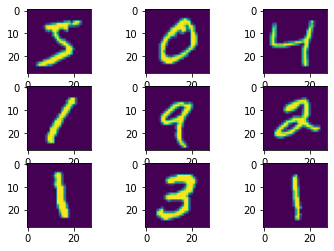

In [4]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#đưa toàn bộ giá trị điểm ảnh về khoảng 0 -> 1.
x=x_test
x_train=x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical
from keras import metrics
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [9]:
#tao lop
model.add(Dense(512,activation="relu",input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [10]:
from tensorflow.keras.optimizers import RMSprop

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [12]:
history=model.fit(x_train, y_train, batch_size=128,epochs =100, verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 8s 8ms/step - loss: 0.2655 - accuracy: 0.9169 - val_loss: 0.1258 - val_accuracy: 0.9614
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1151 - accuracy: 0.9662 - val_loss: 0.1006 - val_accuracy: 0.9697
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0890 - accuracy: 0.9737 - val_loss: 0.0873 - val_accuracy: 0.9766
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0733 - accuracy: 0.9787 - val_loss: 0.0898 - val_accuracy: 0.9788
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0671 - accuracy: 0.9811 - val_loss: 0.0849 - val_accuracy: 0.9800
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0626 - accuracy: 0.9826 - val_loss: 0.0910 - val_accuracy: 0.9788
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0562 - accuracy: 0.9850 - val_loss: 0.1008 - val_accuracy: 0.9794

In [13]:
model.save('Mnist.h5')

In [14]:
from keras.models import load_model
model5 = load_model('Mnist.h5')

In [15]:
#danh gia mo hinh tren tap test
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.9834


[0.4221155643463135, 0.9833999872207642]

313/313 [==============================] - 1s 4ms/step - loss: 0.4221 - accuracy: 0.9834
Test loss =  0.4221155643463135
Test acuracy 0.9833999872207642


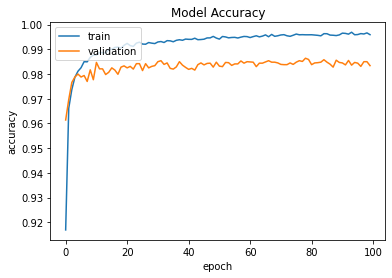

In [16]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss = ',score[0])
print('Test acuracy',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc ='upper left')

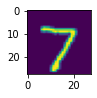

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


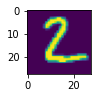

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


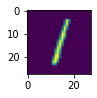

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


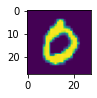

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


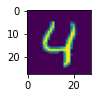

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


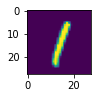

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


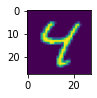

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


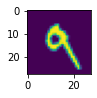

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


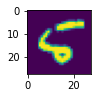

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
import numpy as np
Y_pred = model.predict(x_test)
for i in range(9):
  plt.subplot(330 +i+1)
  plt.imshow(x[i])
  plt.show()
  print(np.round(Y_pred[i]))

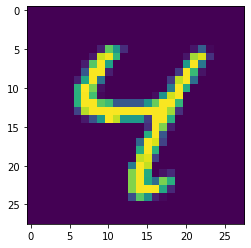

In [18]:
plt.imshow(x[6])

In [19]:
#output cua mo hinh co phan phoi xac suat cua cac nhan
predict_result = model.predict(np.array([x_test[6]]))
print(predict_result)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [20]:
#nhan co gia tri xac saut cao nhat
np.argmax(predict_result)

4